<a href="https://colab.research.google.com/github/Nireplag/mushroom_edibility/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [48]:
# import data

df = pd.read_csv('https://raw.githubusercontent.com/Nireplag/mushroom_edibility/main/mushrooms.csv')

EDA

In [49]:
# make all columns lowercase and check for null values
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns = df.columns.str.replace('-', '_').str.lower()
df.isnull().sum()

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [50]:
# check for variables descriptive statistics
df.describe()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [51]:
#check for categorical values -> all categorical
df.dtypes

class                       object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

<Axes: >

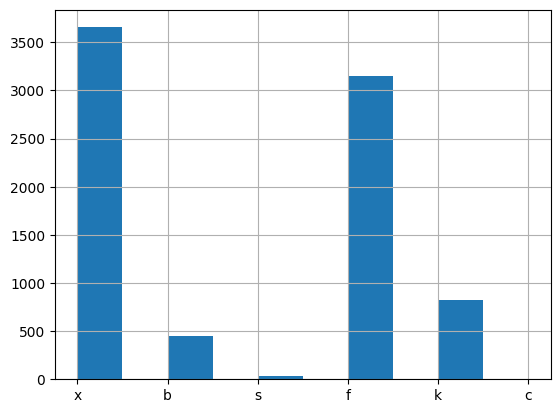

In [52]:
# check data distribution for each feature
df.cap_shape.hist()

<Axes: >

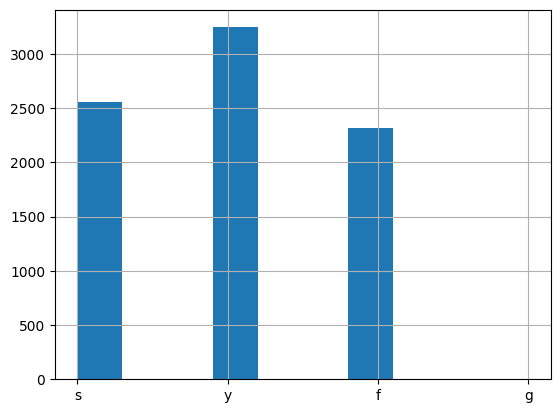

In [53]:
df.cap_surface.hist()

<Axes: >

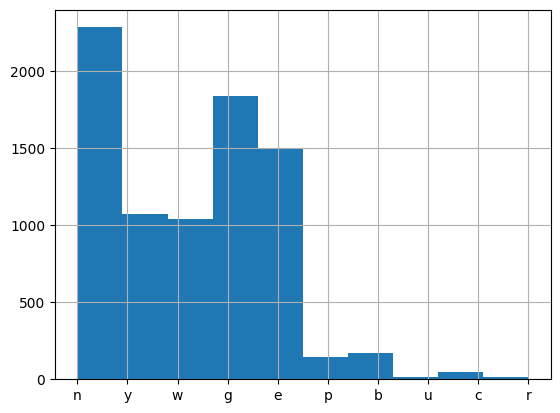

In [54]:
df.cap_color.hist()

<Axes: >

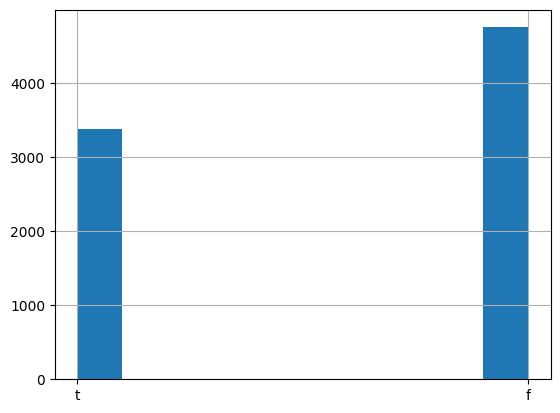

In [55]:
df.bruises.hist()

<Axes: >

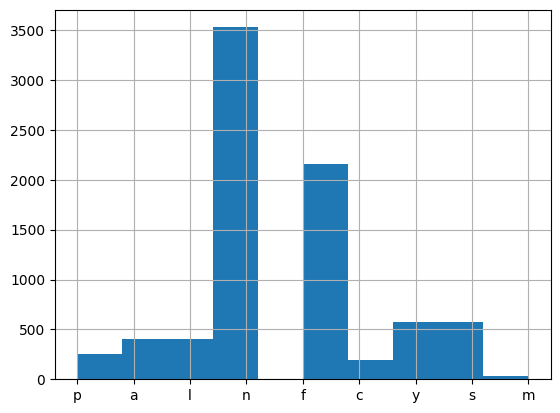

In [56]:
df.odor.hist()

<Axes: >

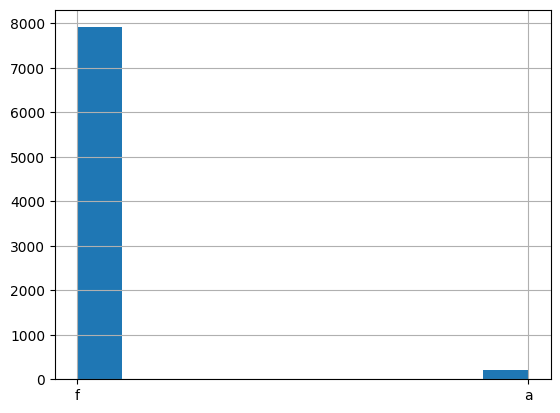

In [57]:
df.gill_attachment.hist()

<Axes: >

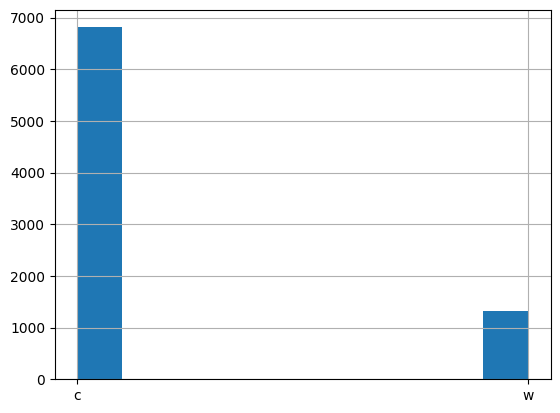

In [58]:
df.gill_spacing.hist()

<Axes: >

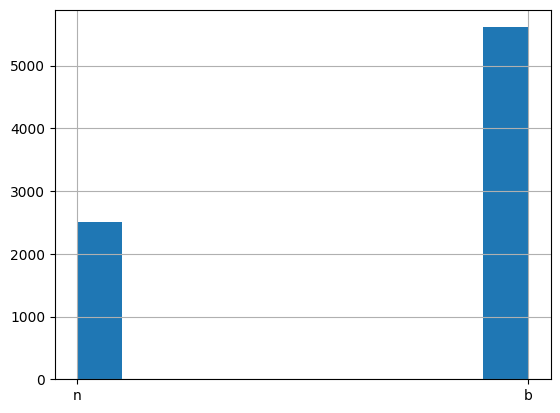

In [59]:
df.gill_size.hist()

<Axes: >

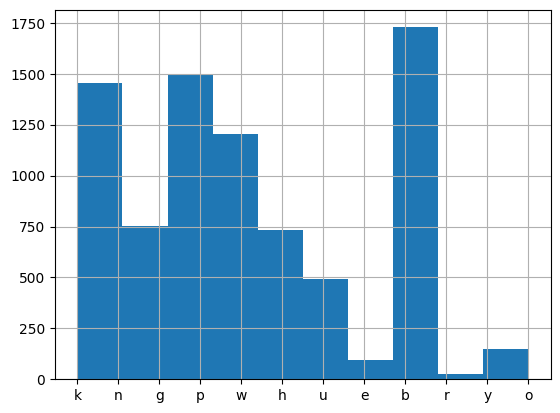

In [60]:
df.gill_color.hist()

<Axes: >

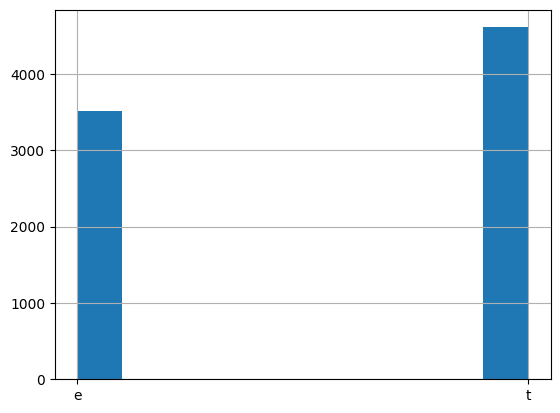

In [61]:
df.stalk_shape.hist()

<Axes: >

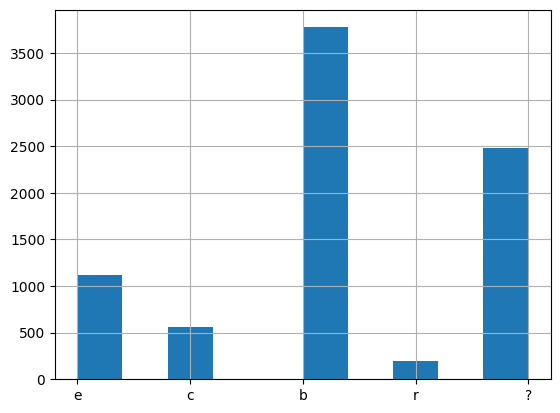

In [62]:
df.stalk_root.hist()

<Axes: >

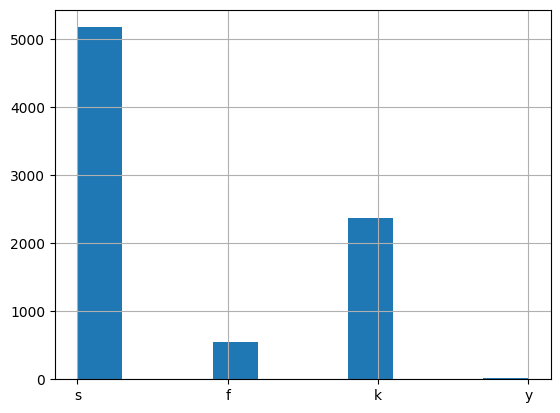

In [63]:
df.stalk_surface_above_ring.hist()

<Axes: >

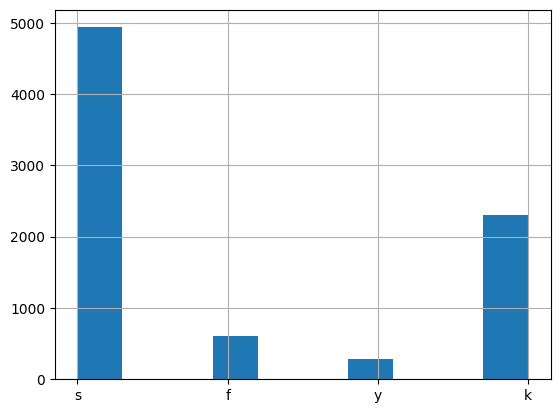

In [64]:
df.stalk_surface_below_ring.hist()

<Axes: >

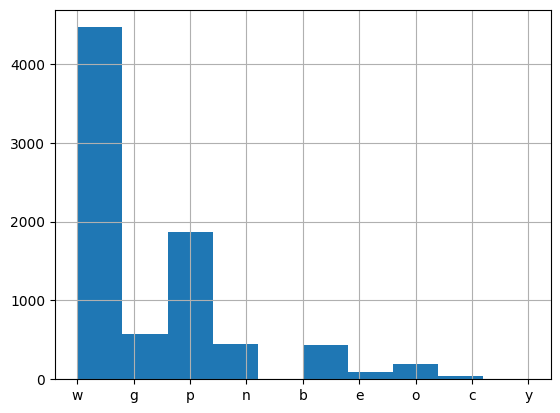

In [65]:
df.stalk_color_above_ring.hist()

<Axes: >

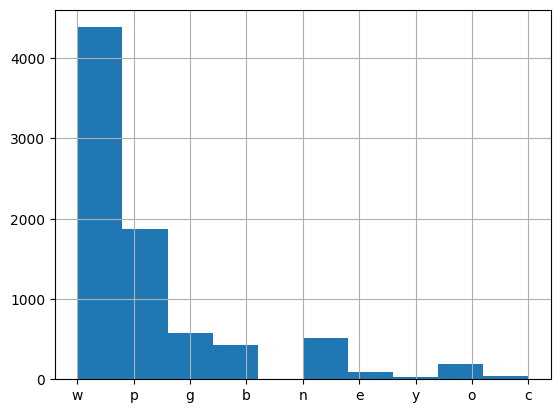

In [66]:
df.stalk_color_below_ring.hist()

<Axes: >

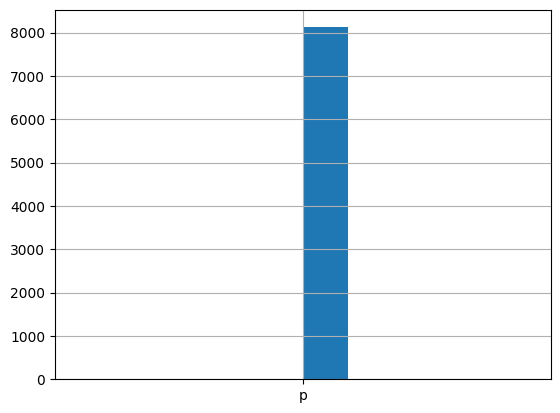

In [67]:
df.veil_type.hist()

<Axes: >

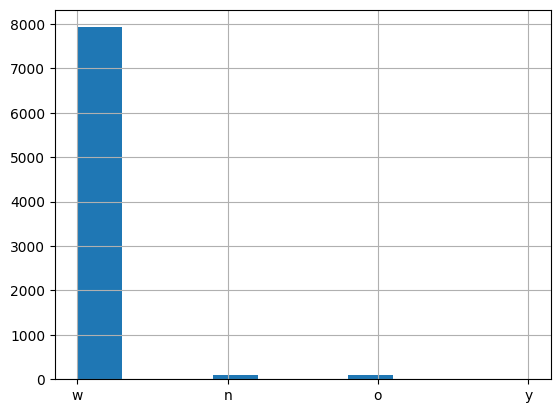

In [68]:
df.veil_color.hist()

<Axes: >

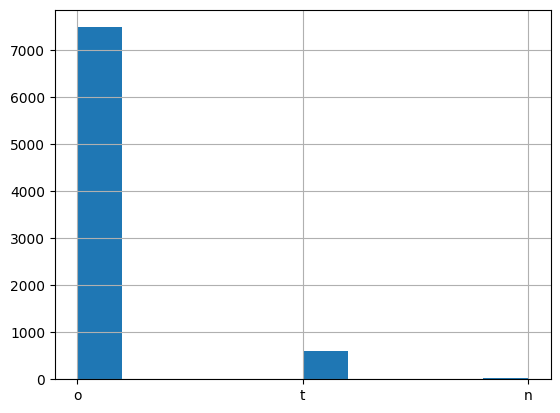

In [69]:
df.ring_number.hist()

<Axes: >

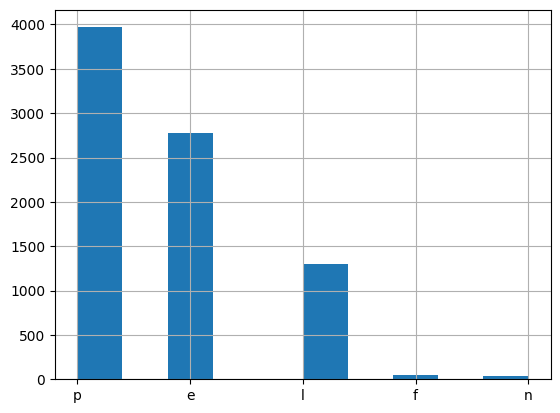

In [70]:
df.ring_type.hist()

<Axes: >

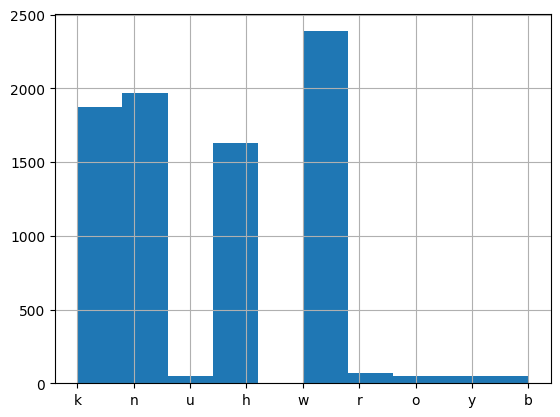

In [71]:
df.spore_print_color.hist()

<Axes: >

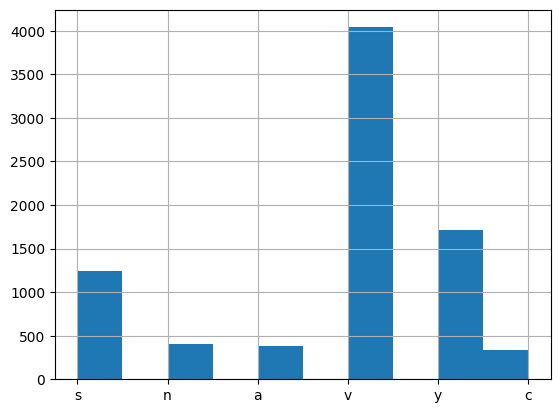

In [72]:
df.population.hist()

<Axes: >

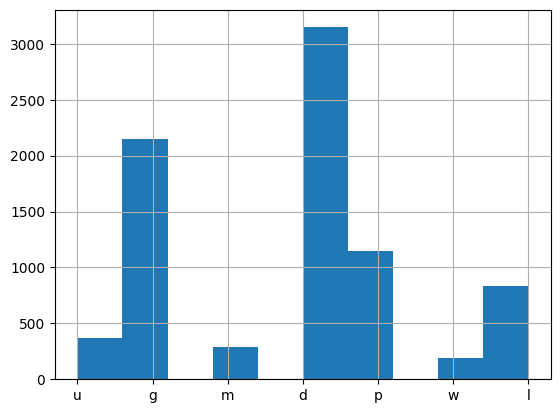

In [73]:
df.habitat.hist()

Since all data is categorical, we do not have normal distributions

In [12]:
# split dataset into test and train

# test data will be 15% of the total

df_train, df_test = train_test_split(df,test_size=0.15, shuffle=True, random_state=7, stratify=df['class'])

x_train = df_train.drop(['class'], axis = 1)
y_train = df_train['class']

x_test = df_test.drop(['class'], axis = 1)
y_test = df_test['class']

NameError: ignored

Feature Importance Analysis

In [75]:
x_train.apply(lambda x:mutual_info_score(y_train,x)).sort_values(ascending=False)

odor                        0.626097
spore_print_color           0.333718
gill_color                  0.287400
ring_type                   0.220090
stalk_surface_above_ring    0.197576
stalk_surface_below_ring    0.189210
stalk_color_above_ring      0.173976
stalk_color_below_ring      0.164755
gill_size                   0.156111
population                  0.136274
bruises                     0.130988
habitat                     0.106849
stalk_root                  0.093008
gill_spacing                0.070435
cap_shape                   0.032417
ring_number                 0.025412
cap_color                   0.024142
cap_surface                 0.019497
veil_color                  0.016905
gill_attachment             0.009879
stalk_shape                 0.005391
veil_type                   0.000000
dtype: float64

Feature veil_type do no infuence into the determination of poisoness.

Features gill_attachment and stalk_shape also have small influence.

All those features will be dropped.

Dependant variable will aso be tranformed to poisonous, so it can be predicted by binary classificators.

In [76]:
x_train = x_train.drop(['veil_type'], axis = 1)
x_train = x_train.drop(['stalk_shape'], axis = 1)
x_train = x_train.drop(['gill_attachment'], axis = 1)

x_test = x_test.drop(['veil_type'], axis = 1)
x_test = x_test.drop(['stalk_shape'], axis = 1)
x_test = x_test.drop(['gill_attachment'], axis = 1)

y_train = (y_train == 'p').astype('int')
y_test = (y_test == 'p').astype('int')

Transform data with dictVectorizer encoder

In [77]:
from sklearn.feature_extraction import DictVectorizer

In [78]:
dv = DictVectorizer(sparse=False)

x_train = dv.fit_transform(x_train.to_dict(orient='records'))
x_test = dv.transform(x_test.to_dict(orient='records'))



Model selection

We will use 4 different models for this classification problem:

    Logistic Regression
    RandomForestClassifier
    XGBoost
    MLPClassifier

Considering that avoiding eating a edible mushroom is better than eating a poisonous one, we need to reduce the false negatives (poisonous classified as edibles), therefore using the metric of recall to determine the best model, plus accuracy score to fing a good balance between metrics.

To avoid overfitting from data we will disconsider combinations that have recall and accuracy equals 1.0


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, accuracy_score

In [83]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
Cs = np.linspace(0.1,1,11)
iters = [50, 70, 100, 200]

best = [0,0,0,0,0]

for solv in solvers:
  for C in Cs:
    for iter in iters:
      model = LogisticRegression(solver=solv, C=C, max_iter=iter, random_state=7)
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)

      acc = accuracy_score(y_test, y_pred)
      rec = recall_score(y_test, y_pred)
      print(f'solver = {solv} C = {C} iterations = {iter} recall = {rec} Acc = {acc}')

      if (rec > best[3] and rec != 1.0):
        best = [solv, C, iter, rec, acc]
      elif(rec == best[3] and (acc > best[4] and acc != 1.0)):
        best = [solv, C, iter, rec, acc]

print('Best model is: ', best)

solver = lbfgs C = 0.1 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.1 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.1 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.1 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.19 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.19 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.19 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.19 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.28 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.28 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.28 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.28 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.37 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.37 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.37 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.37 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.45999999999999996 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.45999999999999996 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.45999999999999996 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = lbfgs C = 0.45999999999999996 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.5499999999999999 iterations = 50 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.5499999999999999 iterations = 70 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.5499999999999999 iterations = 100 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.5499999999999999 iterations = 200 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.64 iterations = 50 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.64 iterations = 70 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.64 iterations = 100 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.64 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.73 iterations = 50 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.73 iterations = 70 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.73 iterations = 100 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.73 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.82 iterations = 50 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.82 iterations = 70 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.82 iterations = 100 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.82 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 0.9099999999999999 iterations = 50 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.9099999999999999 iterations = 70 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.9099999999999999 iterations = 100 recall = 1.0 Acc = 1.0
solver = lbfgs C = 0.9099999999999999 iterations = 200 recall = 1.0 Acc = 1.0
solver = lbfgs C = 1.0 iterations = 50 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


solver = lbfgs C = 1.0 iterations = 70 recall = 1.0 Acc = 1.0
solver = lbfgs C = 1.0 iterations = 100 recall = 1.0 Acc = 1.0
solver = lbfgs C = 1.0 iterations = 200 recall = 1.0 Acc = 1.0
solver = liblinear C = 0.1 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.1 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.1 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.1 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.19 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.19 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.19 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.19 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = liblinear C = 0.28 iteratio

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.82 iterations = 50 recall = 1.0 Acc = 1.0
solver = sag C = 0.82 iterations = 70 recall = 1.0 Acc = 1.0
solver = sag C = 0.82 iterations = 100 recall = 1.0 Acc = 1.0
solver = sag C = 0.82 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 0.9099999999999999 iterations = 50 recall = 1.0 Acc = 1.0
solver = sag C = 0.9099999999999999 iterations = 70 recall = 1.0 Acc = 1.0
solver = sag C = 0.9099999999999999 iterations = 100 recall = 1.0 Acc = 1.0
solver = sag C = 0.9099999999999999 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = sag C = 1.0 iterations = 50 recall = 1.0 Acc = 1.0
solver = sag C = 1.0 iterations = 70 recall = 1.0 Acc = 1.0
solver = sag C = 1.0 iterations = 100 recall = 1.0 Acc = 1.0
solver = sag C = 1.0 iterations = 200 recall = 1.0 Acc = 1.0
solver = saga C = 0.1 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.1 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.1 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.1 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.19 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.19 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.19 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.19 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.28 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.28 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.28 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.28 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.37 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.37 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.37 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.37 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.45999999999999996 iterations = 50 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.45999999999999996 iterations = 70 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.45999999999999996 iterations = 100 recall = 0.9965986394557823 Acc = 0.9983593109105825
solver = saga C = 0.45999999999999996 iterations = 200 recall = 0.9965986394557823 Acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.5499999999999999 iterations = 50 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.5499999999999999 iterations = 70 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.5499999999999999 iterations = 100 recall = 1.0 Acc = 1.0
solver = saga C = 0.5499999999999999 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.64 iterations = 50 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.64 iterations = 70 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.64 iterations = 100 recall = 1.0 Acc = 1.0
solver = saga C = 0.64 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.73 iterations = 50 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.73 iterations = 70 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.73 iterations = 100 recall = 1.0 Acc = 1.0
solver = saga C = 0.73 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.82 iterations = 50 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.82 iterations = 70 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.82 iterations = 100 recall = 1.0 Acc = 1.0
solver = saga C = 0.82 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.9099999999999999 iterations = 50 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.9099999999999999 iterations = 70 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 0.9099999999999999 iterations = 100 recall = 1.0 Acc = 1.0
solver = saga C = 0.9099999999999999 iterations = 200 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 1.0 iterations = 50 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 1.0 iterations = 70 recall = 1.0 Acc = 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


solver = saga C = 1.0 iterations = 100 recall = 1.0 Acc = 1.0
solver = saga C = 1.0 iterations = 200 recall = 1.0 Acc = 1.0
Best model is:  ['lbfgs', 0.1, 50, 0.9965986394557823, 0.9983593109105825]


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
criterias = ['gini', 'entropy', 'log_loss']
estimators = [10, 50, 100, 200, 500]
depths = range(1, 20)

best = [0,0,0,0,0]

for criteria in criterias:
  for estimator in estimators:
    for depth in depths:
      dt = RandomForestClassifier(criterion=criteria, n_estimators= estimator, max_depth= depth, random_state = 7)
      dt.fit(x_train, y_train)
      y_pred = dt.predict(x_test)
      rec = recall_score(y_test, y_pred)
      acc = accuracy_score(y_test, y_pred)

      print(f'Criterion = {criteria} n_estimators = {estimator} max_depth = {depth} rec = {rec} acc = {acc}')


      if (rec > best[3] and rec != 1.0):
        best = [criteria, estimator, depth, rec, acc]
      elif(rec == best[3] and (acc > best[4] and acc != 1.0)):
        best = [criteria, estimator, depth, rec, acc]

print('Best model is: ', best)


Criterion = gini n_estimators = 10 max_depth = 1 rec = 0.7857142857142857 acc = 0.8785890073831009
Criterion = gini n_estimators = 10 max_depth = 2 rec = 0.8197278911564626 acc = 0.9081214109926169
Criterion = gini n_estimators = 10 max_depth = 3 rec = 0.9047619047619048 acc = 0.9540607054963085
Criterion = gini n_estimators = 10 max_depth = 4 rec = 0.9880952380952381 acc = 0.9942575881870386
Criterion = gini n_estimators = 10 max_depth = 5 rec = 0.9846938775510204 acc = 0.992616899097621
Criterion = gini n_estimators = 10 max_depth = 6 rec = 0.9846938775510204 acc = 0.992616899097621
Criterion = gini n_estimators = 10 max_depth = 7 rec = 0.9931972789115646 acc = 0.9967186218211649
Criterion = gini n_estimators = 10 max_depth = 8 rec = 1.0 acc = 1.0
Criterion = gini n_estimators = 10 max_depth = 9 rec = 1.0 acc = 1.0
Criterion = gini n_estimators = 10 max_depth = 10 rec = 1.0 acc = 1.0
Criterion = gini n_estimators = 10 max_depth = 11 rec = 1.0 acc = 1.0
Criterion = gini n_estimators =

In [87]:
import xgboost as xgb

In [88]:
etas = np.linspace(0,1,11)
estimators = [10, 50, 100, 200, 500]
depths = range(1, 20)
best = [0,0,0,0,0]

for eta in etas:
  for estimator in estimators:
    for depth in depths:
      model = xgb.XGBClassifier(n_estimators = estimator, max_depth = depth, learning_rate = eta, random_state = 7)
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      rec = recall_score(y_test, y_pred)
      acc = accuracy_score(y_test, y_pred)

      print(f'ETA = {eta} n_estimators = {estimator} max_depth = {depth} rec = {rec} acc = {acc}')

      if (rec > best[3] and rec != 1.0):
        best = [eta, estimator, depth, rec, acc]
      elif(rec == best[3] and (acc > best[4] and acc != 1.0)):
        best = [eta, estimator, depth, rec, acc]

print('Best model is: ', best)

ETA = 0.0 n_estimators = 10 max_depth = 1 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 2 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 3 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 4 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 5 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 6 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 7 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 8 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 9 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 10 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 11 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 12 rec = 0.0 acc = 0.5176374077112387
ETA = 0.0 n_estimators = 10 max_depth = 13 rec = 0.0 acc = 0.517637407711

In [89]:
from sklearn.neural_network import MLPClassifier

In [90]:
hidden_layers = [50, 100, 200, 500]
solvers = ['lbfgs', 'sgd', 'adam']
alphas = [0.0001, 0.001, 0.01, 0.1, 10, 100]
best = [0,0,0,0,0]

for solver in solvers:
  for hidden_layer in hidden_layers:
    for alpha in alphas:
      model = MLPClassifier(hidden_layer_sizes=(hidden_layer,), solver=solver, alpha = alpha, random_state=7)
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
      rec = recall_score(y_test, y_pred)
      acc = accuracy_score(y_test, y_pred)

      print(f'Solver = {solver} hidden_layer_size = {hidden_layer} alpha = {alpha} rec = {rec} acc = {acc}')

      if (rec > best[3] and rec != 1.0):
        best = [solver, hidden_layer, alpha, rec, acc]
      elif(rec == best[3] and (acc > best[4] and acc != 1.0)):
        best = [solver, hidden_layer, alpha, rec, acc]

print('Best is: ', best)

Solver = lbfgs hidden_layer_size = 50 alpha = 0.0001 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 50 alpha = 0.001 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 50 alpha = 0.01 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 50 alpha = 0.1 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 50 alpha = 10 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 50 alpha = 100 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = lbfgs hidden_layer_size = 100 alpha = 0.0001 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 100 alpha = 0.001 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 100 alpha = 0.01 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 100 alpha = 0.1 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 100 alpha = 10 rec = 1.0 acc = 1.0
Solver = lbfgs hidden_layer_size = 100 alpha = 100 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = lbfgs hidden_layer_size = 200 alpha = 0.0001 rec = 1.0 acc = 1.0
Solver = l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Solver = sgd hidden_layer_size = 100 alpha = 10 rec = 0.9778911564625851 acc = 0.9876948318293683
Solver = sgd hidden_layer_size = 100 alpha = 100 rec = 0.79421768707483 acc = 0.9007383100902379
Solver = sgd hidden_layer_size = 200 alpha = 0.0001 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = sgd hidden_layer_size = 200 alpha = 0.001 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = sgd hidden_layer_size = 200 alpha = 0.01 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = sgd hidden_layer_size = 200 alpha = 0.1 rec = 0.9965986394557823 acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Solver = sgd hidden_layer_size = 200 alpha = 10 rec = 0.9795918367346939 acc = 0.9885151763740772
Solver = sgd hidden_layer_size = 200 alpha = 100 rec = 0.79421768707483 acc = 0.9007383100902379
Solver = sgd hidden_layer_size = 500 alpha = 0.0001 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = sgd hidden_layer_size = 500 alpha = 0.001 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = sgd hidden_layer_size = 500 alpha = 0.01 rec = 0.9965986394557823 acc = 0.9983593109105825
Solver = sgd hidden_layer_size = 500 alpha = 0.1 rec = 0.9965986394557823 acc = 0.9983593109105825


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Solver = sgd hidden_layer_size = 500 alpha = 10 rec = 0.9795918367346939 acc = 0.9885151763740772
Solver = sgd hidden_layer_size = 500 alpha = 100 rec = 0.7976190476190477 acc = 0.9023789991796555
Solver = adam hidden_layer_size = 50 alpha = 0.0001 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 50 alpha = 0.001 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 50 alpha = 0.01 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 50 alpha = 0.1 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 50 alpha = 10 rec = 0.9829931972789115 acc = 0.9893355209187858
Solver = adam hidden_layer_size = 50 alpha = 100 rec = 0.79421768707483 acc = 0.9007383100902379
Solver = adam hidden_layer_size = 100 alpha = 0.0001 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 100 alpha = 0.001 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 100 alpha = 0.01 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 100 alpha = 0.1 rec = 1.0 acc = 1.0
Solver = adam hidden_layer_size = 100 al

Considering the models and parameters provided, all the models reached the same level of recall and accuracy, threfore we will use the simpler one, therefore the Logistic Regression